In [1]:
import numpy as np
import IPython.display
from utils import pc_util
import PIL
from PIL import Image
import io
import skimage.io
from scipy.io import loadmat

In [2]:
import data_loader

In [3]:
X_train, X_test, y_train, y_test = data_loader.get_pointcloud('keypoint')

Dataset name: keypoint
X_train: (846, 2048, 3)
X_test: (212, 2048, 3)
y_train: (846, 2048)
y_test: (212, 2048)


In [4]:
from pc_util import *
def point_cloud_three_views_with_keypoint(points, keypoints):
    print(points.shape)
    print(keypoints.shape)
    img1 = draw_point_cloud(points, normalize=False, zrot=110/180.0*np.pi, xrot=45/180.0*np.pi, yrot=0/180.0*np.pi)
    img2 = draw_point_cloud(points, normalize=False, zrot=70/180.0*np.pi, xrot=135/180.0*np.pi, yrot=0/180.0*np.pi)
    img3 = draw_point_cloud(points, normalize=False, zrot=180.0/180.0*np.pi, xrot=90/180.0*np.pi, yrot=0/180.0*np.pi)
    image_large = np.concatenate([img1, img2, img3], 1)

    keypts_img1 = draw_point_cloud(points[keypoints==1], normalize=False, zrot=110/180.0*np.pi, xrot=45/180.0*np.pi, yrot=0/180.0*np.pi)
    keypts_img2 = draw_point_cloud(points[keypoints==1], normalize=False, zrot=70/180.0*np.pi, xrot=135/180.0*np.pi, yrot=0/180.0*np.pi)
    keypts_img3 = draw_point_cloud(points[keypoints==1], normalize=False, zrot=180.0/180.0*np.pi, xrot=90/180.0*np.pi, yrot=0/180.0*np.pi)
    keypts_image_large = np.concatenate([keypts_img1, keypts_img2, keypts_img3], 1)

    image = np.stack([image_large, image_large, image_large], axis=-1)
    image[:,:,0] += keypts_image_large
    np.clip(image, 0, 1, image)

    return image

(2048, 3)
(2048,)


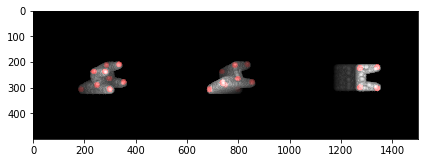

In [5]:
idx = np.random.randint(X_train.shape[0])
img = point_cloud_three_views_with_keypoint(X_train[idx], y_train[idx])
skimage.io.imshow(img)